,Query,Cachesize,NoCache,KARIZ,MRD,CP,Infinite,RCP,LRU,LRU+PG,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,type,CMRp,MRDp,CPp
0,Q1,1800,806,796,796,796,242,796,796.0,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,tiny,1.012563,1.012563,1.012563
1,Q1,300,806,796,796,796,242,796,796.0,796.0,...,NaN,NaN,NaN,NaN,NaN,NaN,tiny,1.012563,1.012563,1.012563
2,Q1,500,806,796,796,796,242,796,806.0,796.0,...,NaN,NaN,NaN,NaN,NaN,NaN,tiny,1.012563,1.012563,1.012563
3,Q1,1000,806,404,796,796,242,796,806.0,806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,tiny,1.995050,1.012563,1.012563
4,Q2,300,563,337,375,375,247,375,806.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,sequential,1.670623,1.501333,1.501333
5,Q3,300,947,947,947,947,373,947,1098.0,NaN,...,NaN,NaN,Kariz,LRU,LRU+PG,MIN+MRD,sequential,1.000000,1.000000,1.000000
6,Q4,300,765,765,765,765,315,765,788.0,NaN,...,NaN,AQ1,242,806,806,242,broadcast,1.000000,1.000000,1.000000
7,Q5,300,1141,966,966,966,426,966,319.0,NaN,...,NaN,AQ10,431,1098,1098,661,sequential,1.181159,1.181159,1.181159
8,Q6,300,473,473,473,473,157,473,670.0,NaN,...,NaN,AQ11,289,788,788,289,tiny,1.000000,1.000000,1.000000
9,Q7,300,779,743,779,743,209,743,279.0,NaN,...,NaN,AQ12,159,319,319,159,aggregate,1.048452,1.000000,1.048452


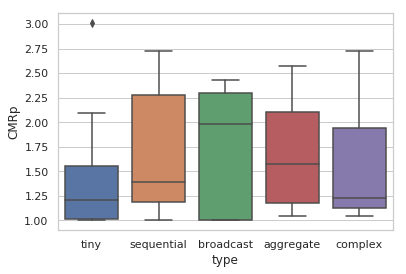

In [30]:
#!/usr/bin/python
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

import seaborn as sns
sns.set(style="whitegrid")


types = {
"Q1" : "tiny",
"Q2" : "sequential",
"Q3" : "sequential",
"Q4" : "broadcast",
"Q5" : "sequential",
"Q6" : "tiny",
"Q7" : "aggregate",
"Q8" : "complex",
"Q9" : "aggregate",
"Q10" : "sequential",
"Q11" : "broadcast",
"Q12" : "sequential",
"Q13" : "sequential",
"Q14" : "tiny",
"Q15" : "complex",
"Q16" : "aggregate",
"Q17" : "tiny",
"Q18" : "complex",
"Q19" : "complex",
"Q20" : "aggregate",
"Q21" : "complex",
"Q22" : "sequential",
}


df = pd.read_csv('/local0/papers/KARIZ/OSDI20/Figures/scripts/SimResultsTPCHWarmCache.csv')
def assign_type(row):
    row['type'] = types[row['Query']]
    return row

df = df.apply(assign_type, axis=1)

df['CMRp'] = df['NoCache']/df['KARIZ']
df['MRDp'] = df['NoCache']/df['MRD']
df['CPp'] = df['NoCache']/df['CP']

sns.boxplot(x="type", y="CMRp", data=df)

df

In [24]:
df2 = df[['type', 'CMRp', 'MRDp', 'CPp']]

df2

,type,CMRp,MRDp,CPp
0,tiny,1.012563,1.012563,1.012563
1,tiny,1.012563,1.012563,1.012563
2,tiny,1.012563,1.012563,1.012563
3,tiny,1.995050,1.012563,1.012563
4,sequential,1.670623,1.501333,1.501333
5,sequential,1.000000,1.000000,1.000000
6,broadcast,1.000000,1.000000,1.000000
7,sequential,1.181159,1.181159,1.181159
8,tiny,1.000000,1.000000,1.000000
9,aggregate,1.048452,1.000000,1.048452


In [27]:
df3 = pd.melt(df2, id_vars=['type'], value_vars=['CMRp', 'MRDp', 'CPp'],
              var_name='alg', value_name='improvement')

df3

,type,alg,improvement
0,tiny,CMRp,1.012563
1,tiny,CMRp,1.012563
2,tiny,CMRp,1.012563
3,tiny,CMRp,1.995050
4,sequential,CMRp,1.670623
5,sequential,CMRp,1.000000
6,broadcast,CMRp,1.000000
7,sequential,CMRp,1.181159
8,tiny,CMRp,1.000000
9,aggregate,CMRp,1.048452


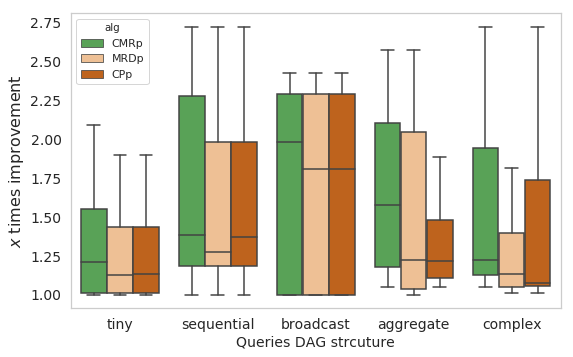

In [45]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.ticker as ticker
import math


colors=['#4daf4a', '#fdc086', '#d95f02', '#4daf4a']
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x="type", y="improvement", hue='alg', data=df3,ax=ax, palette=colors, showfliers=False)

plt.ylabel(r'$x$ times improvement', fontsize=16)
plt.xlabel('Queries DAG strcuture', fontsize=14)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks2))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_yticks2))
ax.tick_params(axis='both', which='major', labelsize=14)
plt.grid(False)
#plt.legend(['MRD', 'CP', 'CMR'], fontsize=16)
plt.subplots_adjust(left=0.13, bottom=0.17, right=0.98, top=0.99)
fig.savefig('../fig_runtimecomparisoncdfwarm.pdf', format='pdf', dpi=200)
fig.savefig('../fig_runtimecomparisoncdfwarm.png', format='png', dpi=200)

plt.show()
                     
